## Predicting Exam Scores from Empatica E4 Data

Dataset source: https://physionet.org/content/wearable-exam-stress/1.0.0/data/S3/Final/#files-panel


The dataset contains physiological data recorded from 10 students during three exam sessions (Midterm 1, Midterm 2, and Final). It includes electrodermal activity (EDA), heart rate (HR), blood volume pulse (BVP), skin surface temperature, inter-beat interval (IBI), and 3-axis accelerometer data. Exam scores for each student’s midterms and final are also provided. Our goal is to use these variables to predict students’ exam scores and explore potential correlations between them—for example, whether a rise in temperature leads to an increase in EDA.


Additionally, we plan to create an interactive simulation where a visual representation of a student sits and takes an exam. The audience will be able to adjust sliders for different physiological variables, and the system will predict the corresponding exam score in real time. We also aim to add fun visual effects: for instance, the figure turning red as temperature increases, or displaying more sweat drops as EDA rises.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

### First Visulisation: Heart Rate for final vs midterm 1 vs midterm 2

In [6]:
s1_hr_final = pd.read_csv("Data/S1/Final/HR.csv")


In [22]:
s1_hr_midterm1 = pd.read_csv("Data/S1/Midterm 1/HR.csv")
s1_hr_midterm2 = pd.read_csv("Data/S1/Midterm 2/HR.csv")

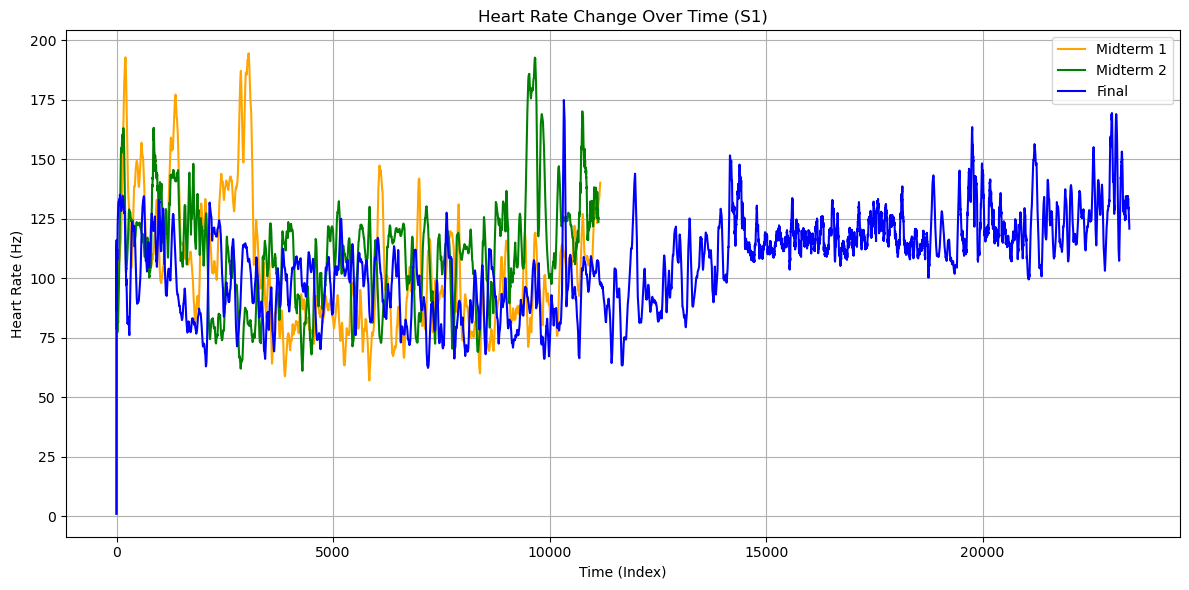

In [25]:

s1_hr_final.columns = ['heart rate in hz']
s1_hr_midterm1.columns = ['heart rate in hz']
s1_hr_midterm2.columns = ['heart rate in hz']

# Create a plot
plt.figure(figsize=(12, 6))

plt.plot(s1_hr_midterm1['heart rate in hz'], label='Midterm 1', color='orange')
plt.plot(s1_hr_midterm2['heart rate in hz'], label='Midterm 2', color='green')
plt.plot(s1_hr_final['heart rate in hz'], label='Final', color='blue')

plt.title('Heart Rate Change Over Time (S1)')
plt.xlabel('Time (Index)')
plt.ylabel('Heart Rate (Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Second Visulisation: Avg HR during Final Exam vs Final Exam Score

In [26]:
s2_hr_final = pd.read_csv("Data/S2/Final/HR.csv")
s3_hr_final = pd.read_csv("Data/S3/Final/HR.csv")
s4_hr_final = pd.read_csv("Data/S4/Final/HR.csv")
s5_hr_final = pd.read_csv("Data/S5/Final/HR.csv")
s6_hr_final = pd.read_csv("Data/S6/Final/HR.csv")
s7_hr_final = pd.read_csv("Data/S7/Final/HR.csv")
s8_hr_final = pd.read_csv("Data/S8/Final/HR.csv")
s9_hr_final = pd.read_csv("Data/S9/Final/HR.csv")
s10_hr_final = pd.read_csv("Data/S10/Final/HR.csv")

In [34]:
s1_hr_avg_final = s1_hr_final.iloc[:, 0].mean()
s2_hr_avg_final = s2_hr_final.iloc[:, 0].mean()
s3_hr_avg_final = s3_hr_final.iloc[:, 0].mean()
s4_hr_avg_final = s4_hr_final.iloc[:, 0].mean()
s5_hr_avg_final = s5_hr_final.iloc[:, 0].mean()
s6_hr_avg_final = s6_hr_final.iloc[:, 0].mean()
s7_hr_avg_final = s7_hr_final.iloc[:, 0].mean()
s8_hr_avg_final = s8_hr_final.iloc[:, 0].mean()
s9_hr_avg_final = s9_hr_final.iloc[:, 0].mean()
s10_hr_avg_final = s10_hr_final.iloc[:, 0].mean()

In [36]:
# final score extracted directly from the txt file on the website
s1_final_score = 182
s2_final_score = 180
s3_final_score = 188
s4_final_score = 149
s5_final_score = 157
s6_final_score = 175
s7_final_score = 110
s8_final_score = 184
s9_final_score = 126
s10_final_score = 116


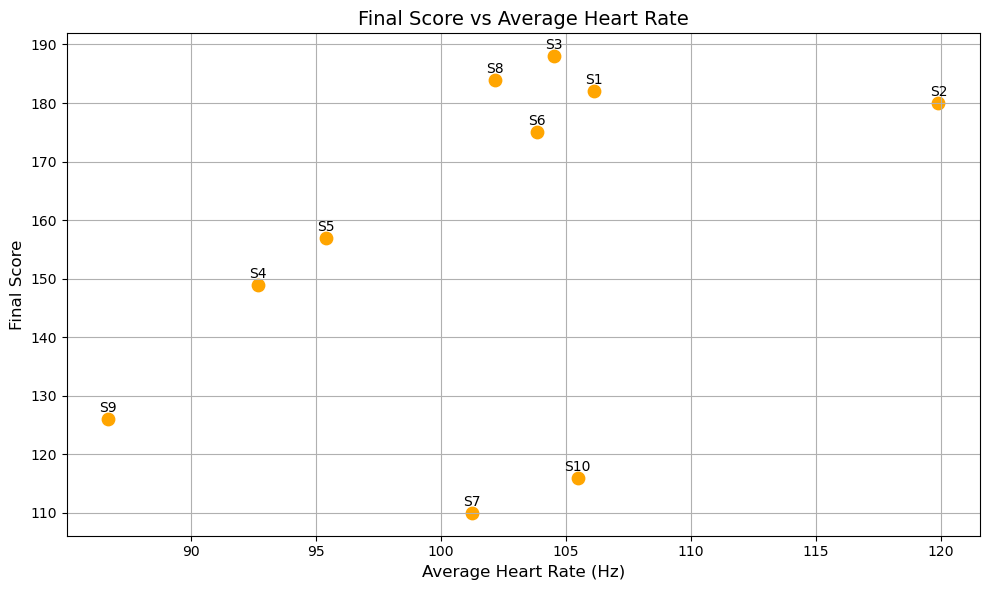

In [37]:
# Final scores

final_scores = [
    s1_final_score, s2_final_score, s3_final_score, s4_final_score, s5_final_score,
    s6_final_score, s7_final_score, s8_final_score, s9_final_score, s10_final_score
]

# Average heart rates
avg_hrs = [
    s1_hr_avg_final, s2_hr_avg_final, s3_hr_avg_final, s4_hr_avg_final, s5_hr_avg_final,
    s6_hr_avg_final, s7_hr_avg_final, s8_hr_avg_final, s9_hr_avg_final, s10_hr_avg_final
]

# Subject labels (optional)
subjects = [f"S{i}" for i in range(1, 11)]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_hrs, final_scores, color='orange', s=80)

# Annotate points with subject IDs
for i in range(len(subjects)):
    plt.annotate(subjects[i], (avg_hrs[i], final_scores[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Labels and title
plt.title("Final Score vs Average Heart Rate", fontsize=14)
plt.xlabel("Average Heart Rate (Hz)", fontsize=12)
plt.ylabel("Final Score", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### Third Visualization: S10’s Movement During Their Final Exam Measured Along X, Y, and Z Directions

In [41]:
s10_final_acc = pd.read_csv("Data/S10/Final/ACC.csv").iloc[1:]
s10_final_acc.columns = ["x", "y", "z"]

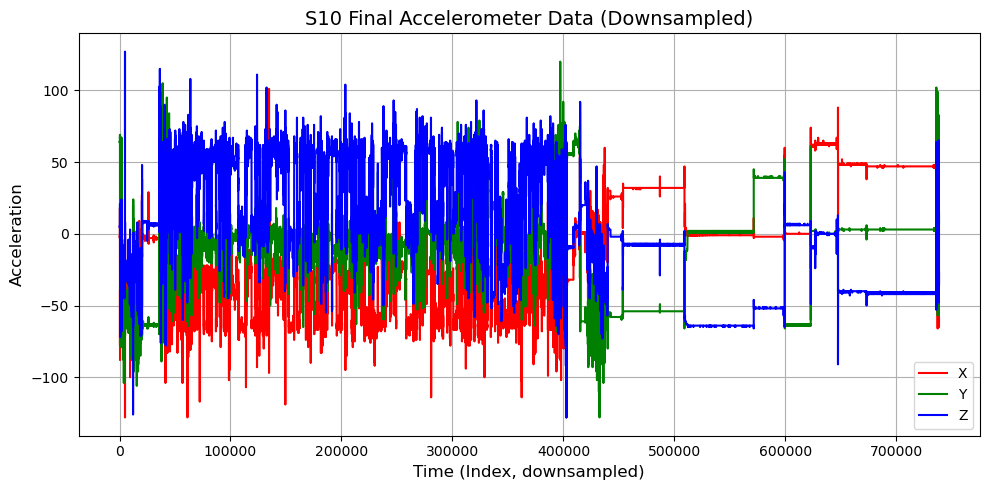

In [46]:
# Show every 10th sample to reduce clutter
downsampled = s10_final_acc.iloc[::10]

plt.figure(figsize=(10, 5))
plt.plot(downsampled["x"], label='X', color='red')
plt.plot(downsampled["y"], label='Y', color='green')
plt.plot(downsampled["z"], label='Z', color='blue')

plt.title("S10 Final Accelerometer Data (Downsampled)", fontsize=14)
plt.xlabel("Time (Index, downsampled)", fontsize=12)
plt.ylabel("Acceleration", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Fourth Visualization: Is there a correlation between Temp and EDA using S3's data?

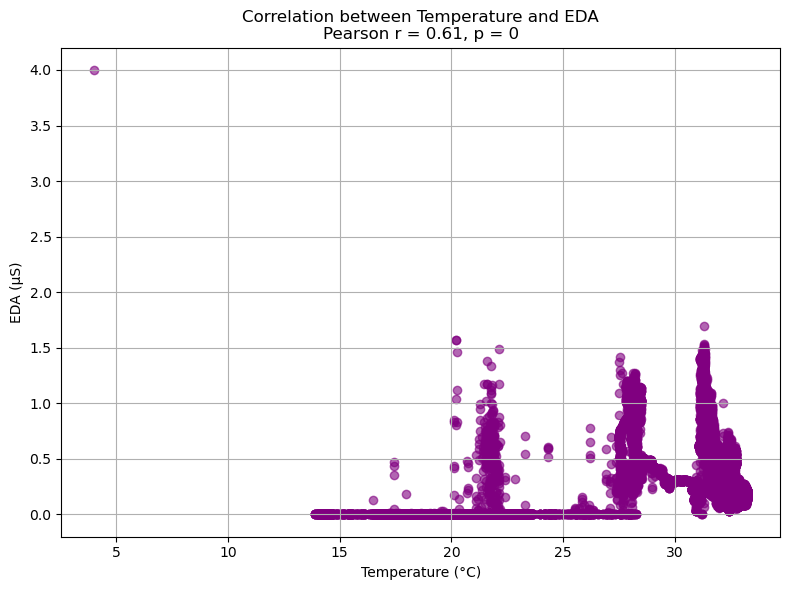

In [50]:
# Load data
s3_final_temp = pd.read_csv("Data/S3/Final/TEMP.CSV")
s3_final_eda = pd.read_csv("Data/S3/Final/EDA.csv")

# Check and align data lengths (assuming same length or truncate to shortest)
min_len = min(len(s3_final_temp), len(s3_final_eda))
temp = s3_final_temp.iloc[:min_len, 0]
eda = s3_final_eda.iloc[:min_len, 0]

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(temp, eda)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(temp, eda, alpha=0.6, color='purple')
plt.title(f"Correlation between Temperature and EDA\nPearson r = {corr_coef:.2f}, p = {p_value:.3g}")
plt.xlabel("Temperature (°C)")
plt.ylabel("EDA (μS)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Last Visualisation: Correlation Heatmap for S4

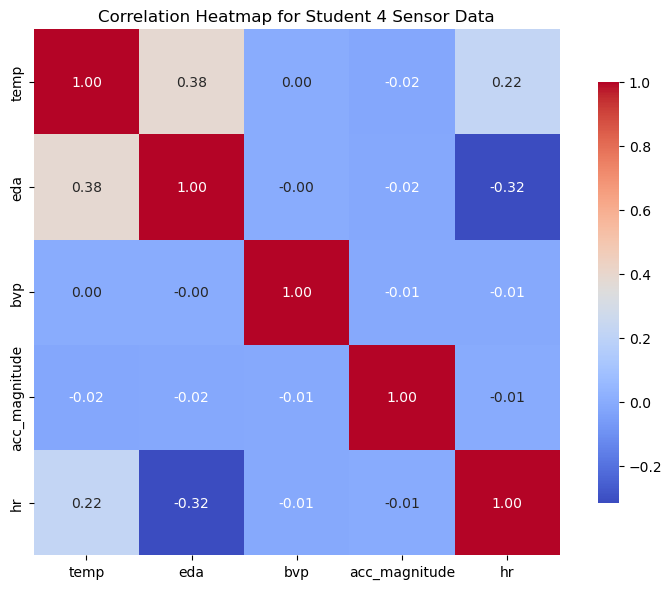

In [55]:
s4_temp = pd.read_csv("Data/S4/Final/TEMP.csv")
s4_eda = pd.read_csv("Data/S4/Final/EDA.csv")
s4_bvp = pd.read_csv("Data/S4/Final/BVP.csv")
s4_acc = pd.read_csv("Data/S4/Final/ACC.csv")
s4_ibi = pd.read_csv("Data/S4/Final/IBI.csv")
s4_hr = pd.read_csv("Data/S4/Final/HR.csv")

# Prepare ACC magnitude
s4_acc.columns = ["x", "y", "z"]
s4_acc = s4_acc.astype(float)
s4_acc['magnitude'] = np.sqrt(s4_acc['x']**2 + s4_acc['y']**2 + s4_acc['z']**2)

# For HR, assume first row is start time, second is sample rate, then data starts at row 3
# If your HR.csv format differs, adjust accordingly
hr_data = s4_hr.iloc[2:, 0].astype(float).reset_index(drop=True)

# Align lengths - find minimum length among signals you want to correlate
min_len = min(len(s4_temp), len(s4_eda), len(s4_bvp), len(s4_acc), len(hr_data))

# Create a combined DataFrame
df = pd.DataFrame({
    'temp': s4_temp.iloc[:min_len, 0].astype(float).values,
    'eda': s4_eda.iloc[:min_len, 0].astype(float).values,
    'bvp': s4_bvp.iloc[:min_len, 0].astype(float).values,
    'acc_magnitude': s4_acc['magnitude'].iloc[:min_len].values,
    'hr': hr_data.iloc[:min_len].values
})


# Compute correlation matrix
corr = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap for Student 4 Sensor Data")
plt.tight_layout()
plt.show()